In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [2]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,0,Yes indeed. She sort of reminds me of the elde...,0.979439,0.022946,0.996452,0.016314,0.021729,0.003200,0.004247,...,0.979439,0.022946,0.996452,True,0.0,1.0,1.0,False,0.967461,0.042144
1,1,0,Yes indeed. She sort of reminds me of the elde...,0.865400,0.223174,0.950641,0.049838,0.051277,0.048247,0.084761,...,0.865400,0.223174,0.950641,True,0.0,1.0,1.0,False,0.967461,0.042144
2,2,0,Yes indeed. She sort of reminds me of the elde...,0.997998,0.002761,0.999996,0.001491,0.001997,0.000004,0.000512,...,0.997998,0.002761,0.999996,True,0.0,1.0,1.0,False,0.967461,0.042144
3,3,0,Yes indeed. She sort of reminds me of the elde...,0.972739,0.048130,0.999696,0.014822,0.021249,0.000300,0.012439,...,0.972739,0.048130,0.999696,True,0.0,1.0,1.0,False,0.967461,0.042144
4,4,0,Yes indeed. She sort of reminds me of the elde...,0.991905,0.010910,0.997815,0.007289,0.011239,0.002185,0.000806,...,0.991905,0.010910,0.997815,True,0.0,1.0,1.0,False,0.967461,0.042144


In [3]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
5,0,6030,"It's that season, when niggas go to jail for n...",0.325298,0.088896,0.284761,0.214807,0.069897,0.322640,0.459894,...,0.214807,0.069897,0.322640,False,2.0,0.6,0.6,True,0.751516,0.183129
6,1,6030,"It's that season, when niggas go to jail for n...",0.289688,0.056357,0.315893,0.293534,0.136602,0.399393,0.416778,...,0.289688,0.056357,0.315893,False,2.0,0.6,0.6,True,0.751516,0.183129
7,2683,6030,"It's that season, when niggas go to jail for n...",0.375071,0.146084,0.386261,0.052920,0.036037,0.056826,0.572009,...,0.572009,0.137849,0.556913,True,2.0,0.6,0.6,False,0.751516,0.183129
8,5548,6030,"It's that season, when niggas go to jail for n...",0.229786,0.155913,0.052430,0.033205,0.055155,0.004640,0.737009,...,0.737009,0.189778,0.942930,True,2.0,0.6,0.6,False,0.751516,0.183129
9,6427,6030,"It's that season, when niggas go to jail for n...",0.356922,0.039684,0.354974,0.053855,0.052186,0.049717,0.589223,...,0.589223,0.072862,0.595310,True,2.0,0.6,0.6,False,0.751516,0.183129


In [10]:
both_votes_df['label'] = both_votes_df['label'].astype(int)

In [4]:
cartography_df['Mindex'].nunique()

31652

In [11]:
both_votes_df[both_votes_df['Mindex'] == 6030][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.2148074775934219,
        "It's that season, when niggas go to jail for no reason.", 0, 2,
        1],
       [0.2896877378225326,
        "It's that season, when niggas go to jail for no reason.", 1, 1,
        0],
       [0.5720087110996246,
        "It's that season, when niggas go to jail for no reason.", 2683,
        2, 2],
       [0.7370088219642639,
        "It's that season, when niggas go to jail for no reason.", 5548,
        2, 2],
       [0.5892233431339264,
        "It's that season, when niggas go to jail for no reason.", 6427,
        2, 2]], dtype=object)

In [7]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.2148074775934219,
        "It's that season, when niggas go to jail for no reason.", 2,
        1.0],
       [0.0681763602420687,
        '@papillonpsyche gerry and Martin "mortifying gay parents" solidarity',
        0, 2.0],
       [0.910931134223938,
        "Hitler didn't finish it. Can u. If a nigger ur Jew confronts u in the street what then.",
        2, 2.0],
       [0.821619176864624,
        'Yes, in barbaric, authoritarian cultures that have since been condemned. Interesting that Christians desire to perpetuate the same idea.',
        0, 0.0]], dtype=object)

In [14]:
len(both_votes_df)

65881

In [15]:
both_votes_df['Mindex'].nunique()

9556

In [38]:
grouped_data_label = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 2: 'label_2'}, inplace=True)
grouped_data_label.fillna(0.0, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1,label_2
0,2,0.000000,0.274606,0.236653
1,3,0.913728,0.000000,0.130511
2,4,0.899364,0.000000,0.590355
3,9,0.725200,0.262707,0.534303
4,13,0.828116,0.268279,0.000000


In [39]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9556 entries, 0 to 9555
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mindex   9556 non-null   int64  
 1   label_0  9556 non-null   float64
 2   label_1  9556 non-null   float64
 3   label_2  9556 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 298.8 KB


In [49]:
# for all label greater
condition1 = ((grouped_data_label['label_0'] > 0.5) | (grouped_data_label['label_0'] == 0.0)) & ((grouped_data_label['label_1'] > 0.5) | (grouped_data_label['label_1'] == 0.0)) & ((grouped_data_label['label_2'] > 0.5) | (grouped_data_label['label_2'] == 0.0))
# for all label lower
condition2 = (grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5) & (grouped_data_label['label_2'] <= 0.5)
# for 2 labels greater when all 3 are present

condition3 = ((grouped_data_label['label_0'] > 0.5) ^ (grouped_data_label['label_1'] > 0.5) ^ (grouped_data_label['label_2'] > 0.5))

# condition3 = (grouped_data_label['label_0'] > 0.5) | (grouped_data_label['label_1'] > 0.5) | (grouped_data_label['label_2'] > 0.5)
# for only 1 label greater when 2 or 3 are present
condition4 = (~condition1) & (~condition2) & (~condition3)

In [50]:
grouped_data_label[condition3].head()

label,Mindex,label_0,label_1,label_2
1,3,0.913728,0.000000,0.130511
4,13,0.828116,0.268279,0.000000
5,14,0.602813,0.249745,0.499229
6,16,0.758738,0.152366,0.000000
7,17,0.375968,0.148244,0.634148


In [51]:
all_greater = len(grouped_data_label[condition1])
none_greater = len(grouped_data_label[condition2])
one_greater = len(grouped_data_label[condition3])
two_greater = len(grouped_data_label[condition4])

all_greater, two_greater, one_greater, none_greater

(997, 182, 7222, 1155)

<Axes: >

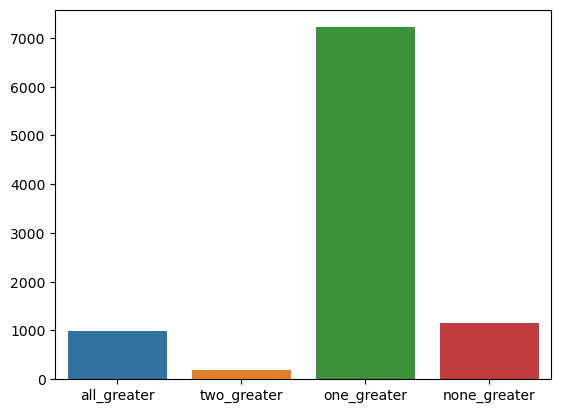

In [54]:
sns.barplot(x=['all_greater', 'two_greater', 'one_greater', 'none_greater'], y=[all_greater, two_greater, one_greater, none_greater])